In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/customer_support_tickets.csv")

In [ ]:
data

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [ ]:
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
data.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [ ]:
# Display dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [ ]:
data.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [ ]:
# Checking missing values
missing_values = data.isnull().sum()
missing_values

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [ ]:
data

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
10,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0
11,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,8453,Craig Forbes,jessica60@example.org,62,Female,MacBook Pro,2020-03-29,Refund request,Display issue,I'm having an issue with the {product_purchase...,Closed,Interesting show must successful.,Critical,Phone,2023-06-01 14:14:05,2023-06-01 05:47:05,3.0
8453,8454,Paula Vazquez,wanderson@example.com,61,Other,iPhone,2020-06-20,Billing inquiry,Peripheral compatibility,The {product_purchased} is unable to establish...,Closed,Skill expect admit and.,High,Chat,2023-06-01 12:56:06,2023-06-01 04:45:06,5.0
8455,8456,Ariel Lee,thompsonsamuel@example.org,54,Other,Dyson Vacuum Cleaner,2021-02-02,Billing inquiry,Refund request,"I've recently set up my {product_purchased}, b...",Closed,Say position key appear behavior.,High,Email,2023-06-01 14:15:07,2023-06-01 06:58:07,1.0
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0


In [ ]:
# Count top 10 most frequent ticket subjects (issues)
top_issues = data['Ticket Subject'].value_counts().head(10)

# Display the top 10 issues
print("Top 10 Common Issues:")
print(top_issues)

Top 10 Common Issues:
Ticket Subject
Network problem           201
Software bug              199
Product compatibility     195
Product recommendation    186
Product setup             183
Hardware issue            183
Delivery problem          178
Refund request            178
Battery life              173
Account access            171
Name: count, dtype: int64


<ipython-input-13-4277957524>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_issues.values, y=top_issues.index, palette="rocket")


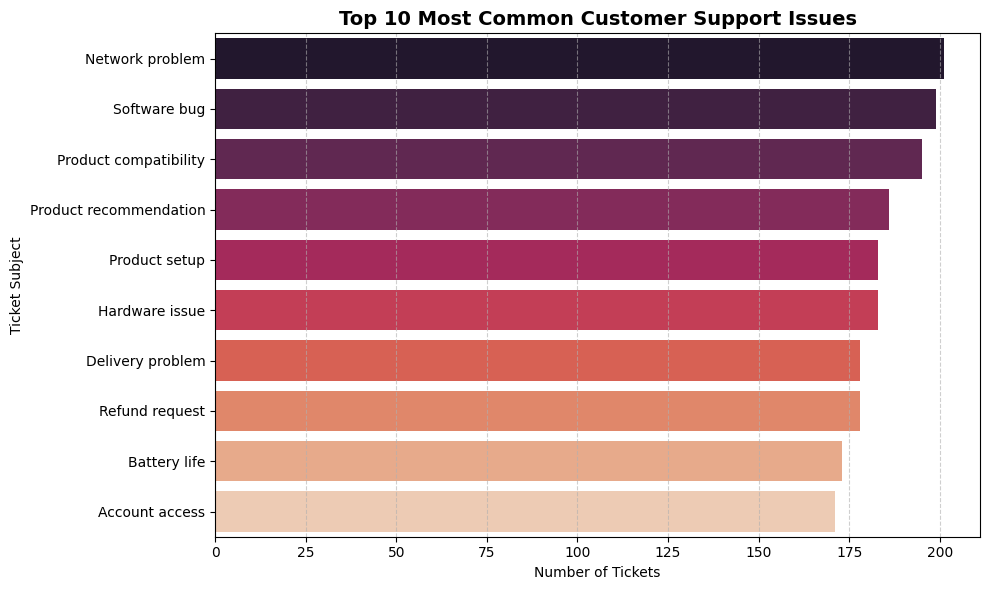

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=top_issues.values, y=top_issues.index, palette="rocket")
plt.title("Top 10 Most Common Customer Support Issues", fontsize=14, fontweight='bold')
plt.xlabel("Number of Tickets")
plt.ylabel("Ticket Subject")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

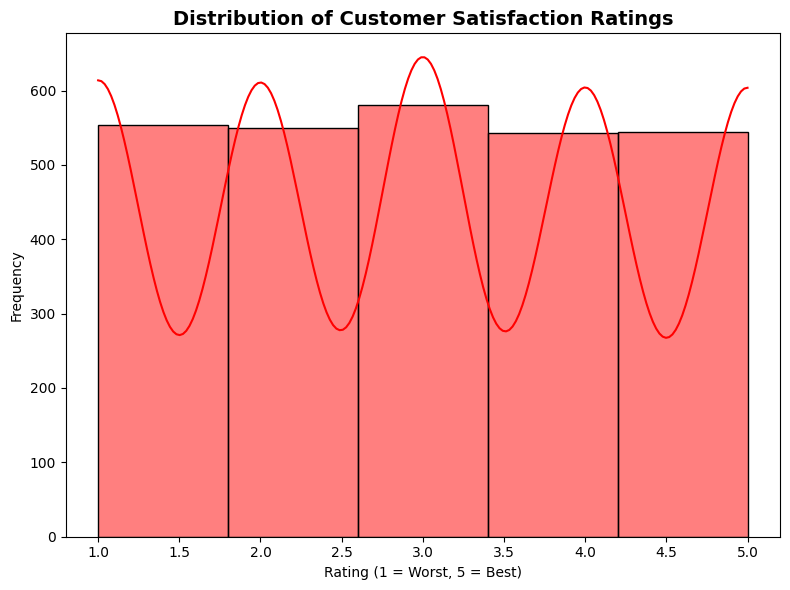

In [ ]:
# Filter only rows with satisfaction ratings
rated = data.dropna(subset=['Customer Satisfaction Rating'])

plt.figure(figsize=(8, 6))
sns.histplot(rated['Customer Satisfaction Rating'], bins=5, kde=True, color='red')
plt.title("Distribution of Customer Satisfaction Ratings", fontsize=14, fontweight='bold')
plt.xlabel("Rating (1 = Worst, 5 = Best)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

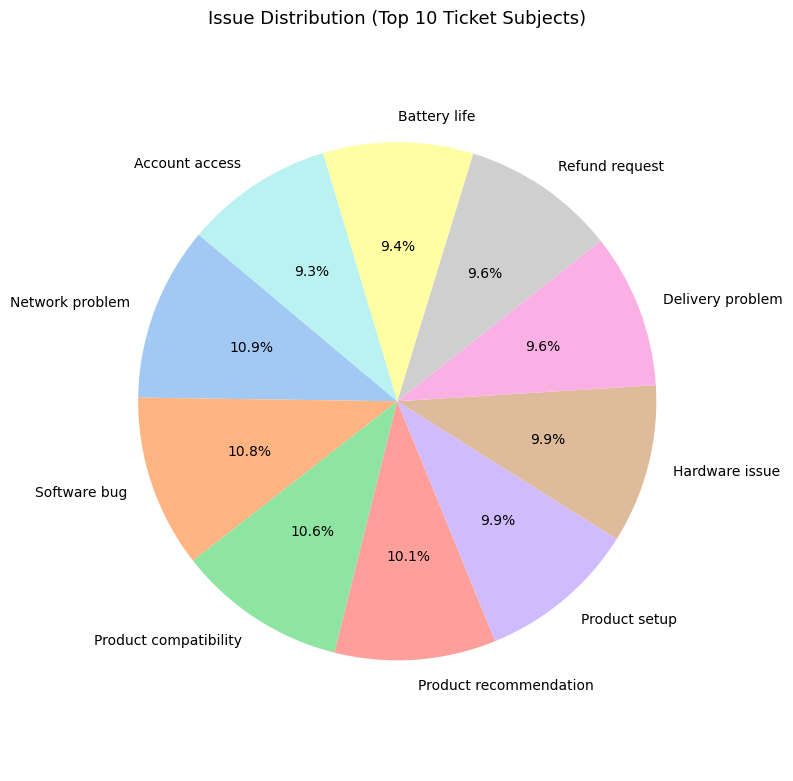

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(top_issues, labels=top_issues.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette("pastel"))
plt.title("Issue Distribution (Top 10 Ticket Subjects)", fontsize=13)
plt.axis('equal')
plt.tight_layout()
plt.show()

<ipython-input-16-1387743088>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['First Response Time'] = pd.to_datetime(data['First Response Time'], errors='coerce')
<ipython-input-16-1387743088>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], errors='coerce')
<ipython-input-16-1387743088>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

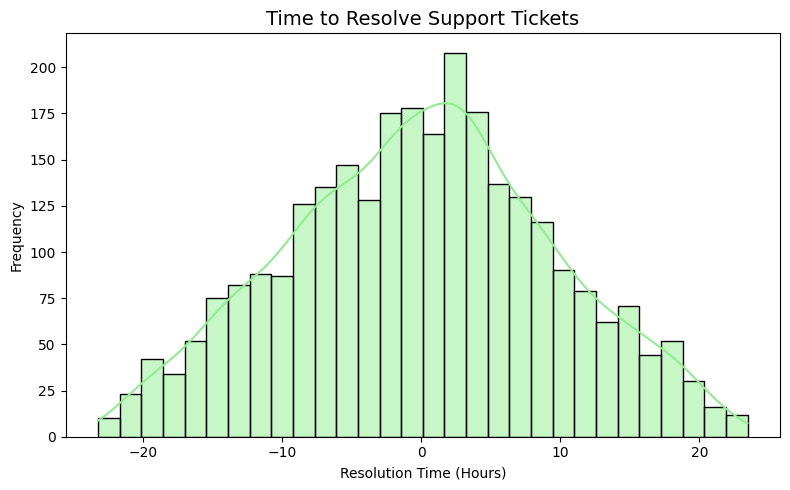

In [ ]:
# Convert to datetime
data['First Response Time'] = pd.to_datetime(data['First Response Time'], errors='coerce')
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], errors='coerce')

# Calculate resolution time in hours
data['Resolution Time (Hrs)'] = (
    data['Time to Resolution'] - data['First Response Time']
).dt.total_seconds() / 3600

# Filter resolved tickets
resolved = data.dropna(subset=['Resolution Time (Hrs)'])

plt.figure(figsize=(8, 5))
sns.histplot(resolved['Resolution Time (Hrs)'], bins=30, color='lightgreen', kde=True)
plt.title("Time to Resolve Support Tickets", fontsize=14)
plt.xlabel("Resolution Time (Hours)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

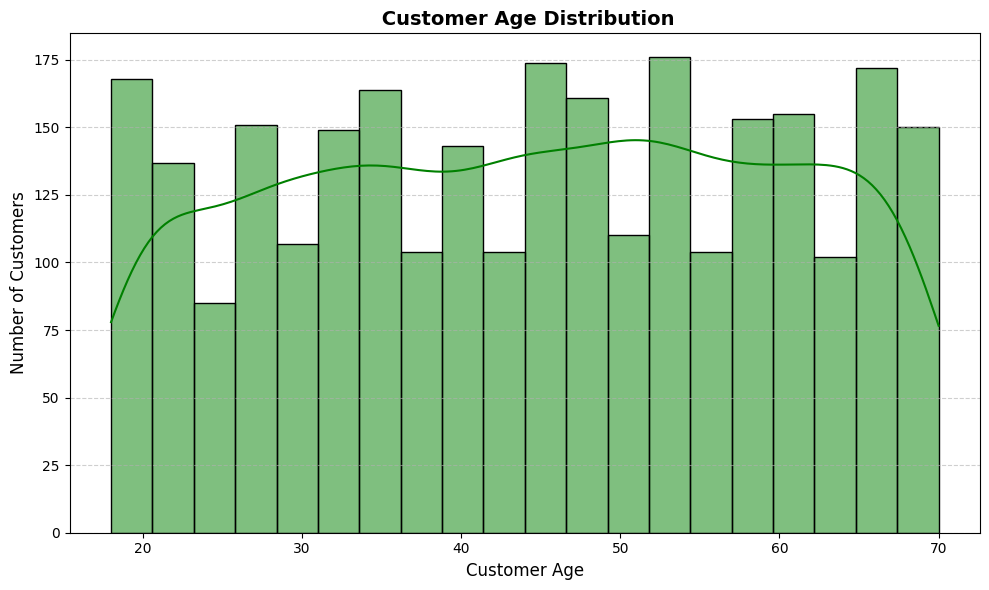

In [ ]:
# Suppress the warning from seaborn/pandas
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Plot Customer Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Age'], bins=20, kde=True, color='green', edgecolor='black')
plt.title(' Customer Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Customer Age', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<ipython-input-18-1313217049>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age Group'] = pd.cut(data['Customer Age'], bins=bins, labels=labels, right=False)


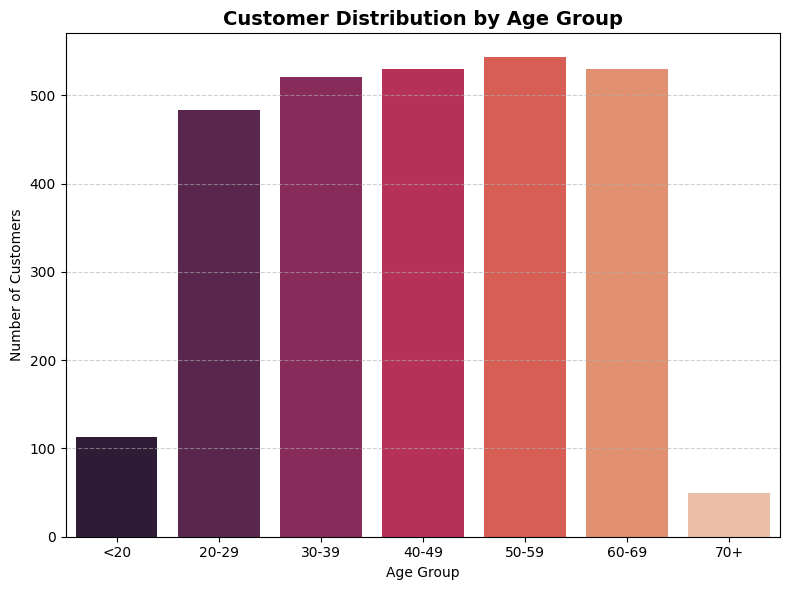

In [ ]:
# Create age groups
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
data['Age Group'] = pd.cut(data['Customer Age'], bins=bins, labels=labels, right=False)

# Count by age group
age_group_counts = data['Age Group'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="rocket")
plt.title('Customer Distribution by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

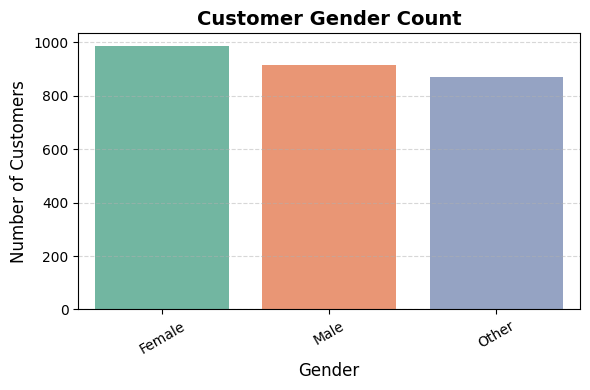

Customer Gender
Female    984
Male      916
Other     869
Name: count, dtype: int64


In [ ]:
# Ensure gender_counts is defined
if 'Customer Gender' in data.columns:
    gender_counts = data['Customer Gender'].value_counts()

    # Sort values for better visualization
    gender_counts = gender_counts.sort_values(ascending=False)

    # Plot
    plt.figure(figsize=(6, 4))
    sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')

    # Improve readability
    plt.title('Customer Gender Count', fontsize=14, fontweight='bold')
    plt.xlabel('Gender', fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.xticks(rotation=30)  # Rotate labels if needed
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    print(gender_counts)
else:
    print("Error: 'Customer Gender' column not found in the dataset!")

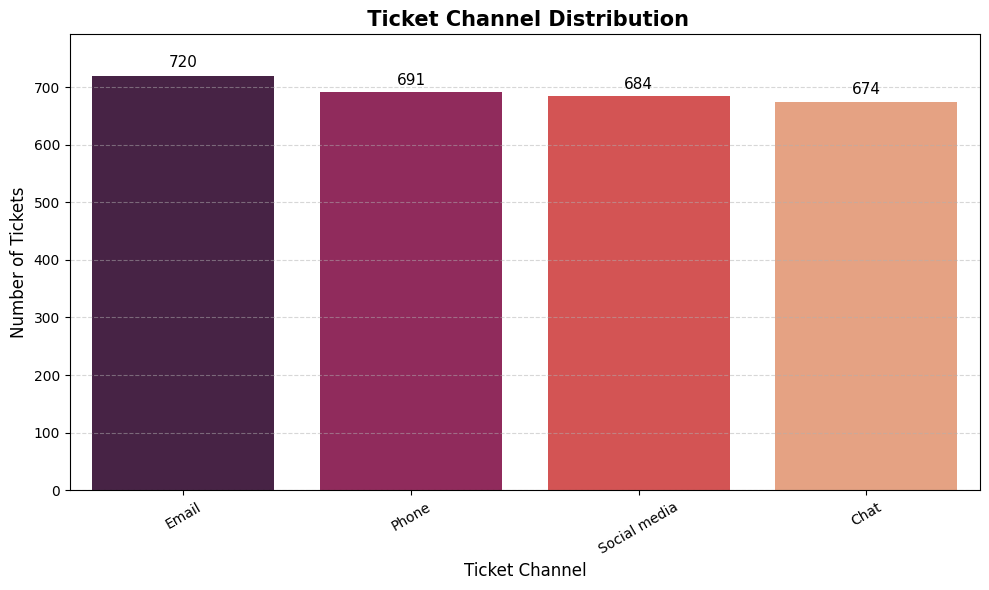

Ticket Channel
Email           720
Phone           691
Social media    684
Chat            674
Name: count, dtype: int64


In [ ]:
# Ensure ticket_channel_distribution is defined and sorted
if 'Ticket Channel' in data.columns:
    ticket_channel_distribution = data['Ticket Channel'].value_counts().sort_values(ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    bars = sns.barplot(x=ticket_channel_distribution.index,
                       y=ticket_channel_distribution.values,
                       palette='rocket')

    # Value labels on each bar (dynamic positioning)
    for bar in bars.patches:
        plt.text(bar.get_x() + bar.get_width() / 2,
                 bar.get_height() + (bar.get_height() * 0.02),  # Adjust position dynamically
                 f'{int(bar.get_height())}',
                 ha='center', fontsize=11)

    # Improve visualization
    plt.title(' Ticket Channel Distribution', fontsize=15, fontweight='bold')
    plt.xlabel('Ticket Channel', fontsize=12)
    plt.ylabel('Number of Tickets', fontsize=12)
    plt.xticks(rotation=30)  # Rotate labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.5)  # Light grid for better reference
    plt.ylim(0, ticket_channel_distribution.max() * 1.1)  # Adjust ylim for better label spacing
    plt.tight_layout()
    plt.show()

    print(ticket_channel_distribution)
else:
    print("Error: 'Ticket Channel' column not found in the dataset!")

Average Satisfaction Ratings:
 Customer_Gender
Male      4.1
Female    3.8
Other     4.4
Name: Customer_Satisfaction_Rating, dtype: float64


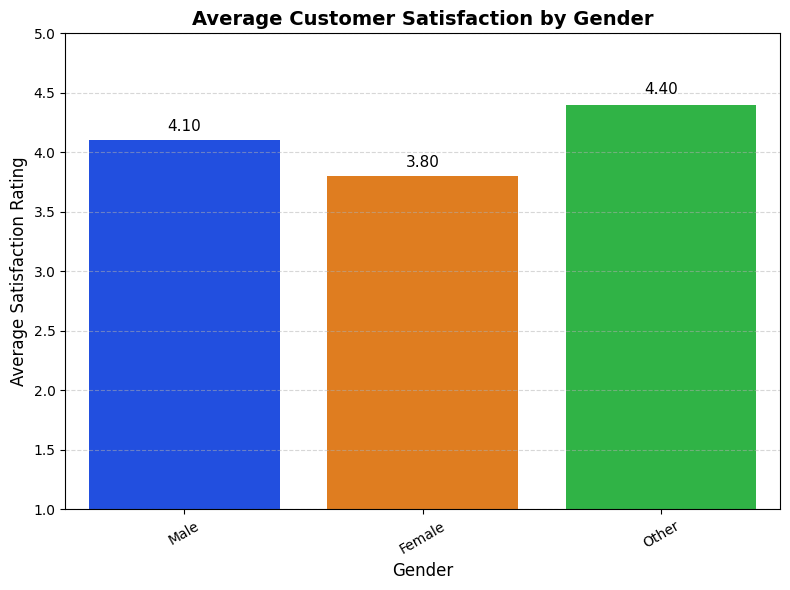

In [ ]:
# Sample data (Replace this with your actual dataset)
data = pd.DataFrame({
    'Customer_Gender': ['Male', 'Female', 'Other', 'Male', 'Female', 'Other', 'Female'],
    'Customer_Satisfaction_Rating': [4.2, 3.8, 4.5, 4.0, 3.9, 4.3, 3.7]
})

# Ensure average_satisfaction is defined
if 'Customer_Gender' in data.columns and 'Customer_Satisfaction_Rating' in data.columns:
    average_satisfaction = data.groupby('Customer_Gender')['Customer_Satisfaction_Rating'].mean()

    # Sort values for better visualization
    average_satisfaction = average_satisfaction.reindex(['Male', 'Female', 'Other'])

    print("Average Satisfaction Ratings:\n", average_satisfaction)  # Print the values before plotting

    # Plot
    plt.figure(figsize=(8, 6))
    bars = sns.barplot(x=average_satisfaction.index,
                       y=average_satisfaction.values,
                       palette='bright')

    # Add value labels on bars (dynamic positioning)
    for bar in bars.patches:
        plt.text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + (bar.get_height() * 0.02),  # Adjust position dynamically
                 f"{bar.get_height():.2f}",
                 ha='center', fontsize=11)

    # Improve visualization
    plt.title('Average Customer Satisfaction by Gender', fontsize=14, fontweight='bold')
    plt.xlabel('Gender', fontsize=12)
    plt.ylabel('Average Satisfaction Rating', fontsize=12)
    plt.xticks(rotation=30)  # Rotate labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.5)  # Light grid for better reference
    plt.ylim(1, 5)  # Adjust ylim for better label spacing
    plt.tight_layout()
    plt.show()
else:
     print("Error: Required columns ('Customer_Gender', 'Customer_Satisfaction_Rating') are missing!")

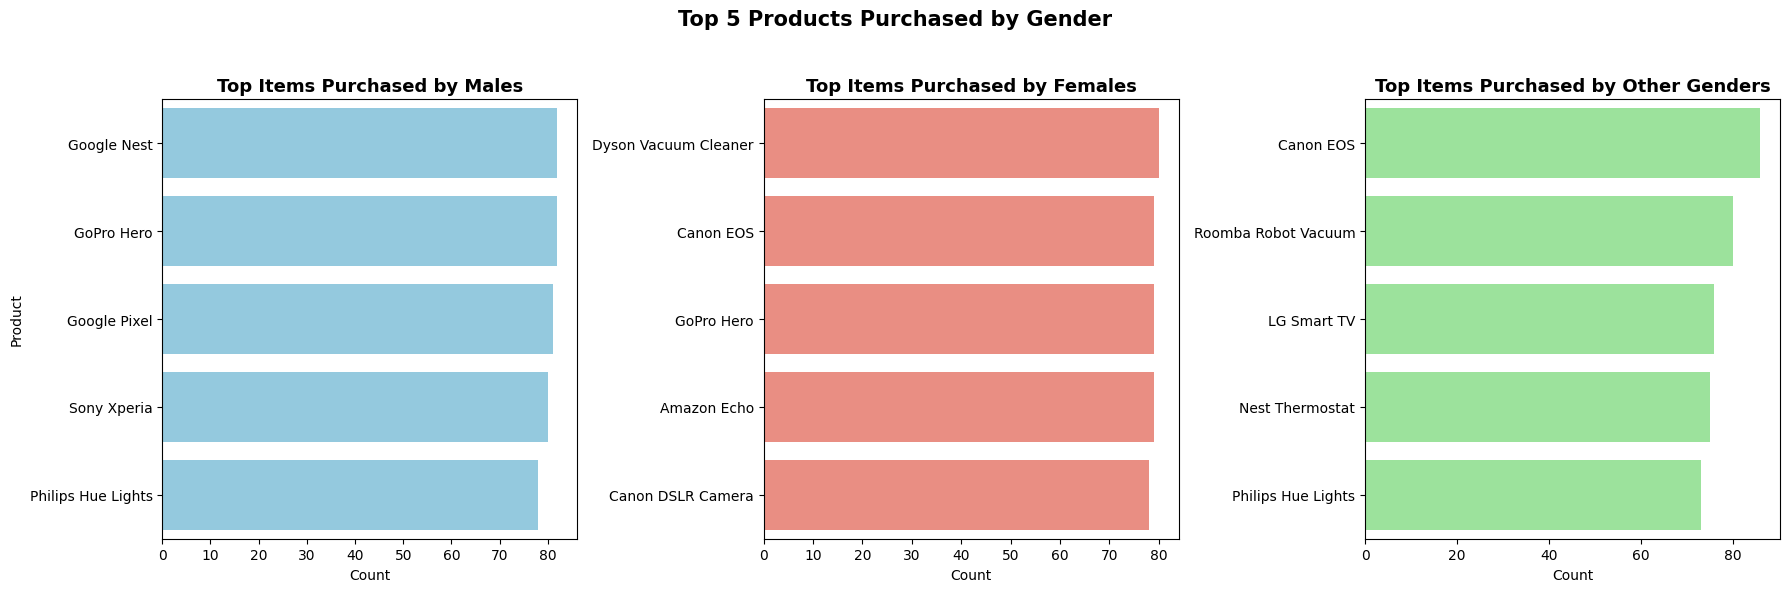

In [ ]:
# Define file path
import os
file_path = '/content/drive/MyDrive/customer_support_tickets.csv'
# Check if the file exists before reading
if os.path.exists(file_path):
    data = pd.read_csv(file_path)

    # Clean and format gender values
    data['Customer Gender'] = data['Customer Gender'].astype(str).str.strip()

    # Plot: Top 5 Products Purchased by Gender
    plt.figure(figsize=(18, 6))

    # Top for Males
    plt.subplot(1, 3, 1)
    top_male = data[data['Customer Gender'] == 'Male']['Product Purchased'].value_counts().head(5)
    sns.barplot(x=top_male.values, y=top_male.index, color='skyblue')
    plt.title('Top Items Purchased by Males', fontsize=13, fontweight='bold')
    plt.xlabel('Count')
    plt.ylabel('Product')

    # Top for Females
    plt.subplot(1, 3, 2)
    top_female = data[data['Customer Gender'] == 'Female']['Product Purchased'].value_counts().head(5)
    sns.barplot(x=top_female.values, y=top_female.index, color='salmon')
    plt.title('Top Items Purchased by Females', fontsize=13, fontweight='bold')
    plt.xlabel('Count')
    plt.ylabel('')

    # Top for Others
    plt.subplot(1, 3, 3)
    top_other = data[data['Customer Gender'] == 'Other']['Product Purchased'].value_counts().head(5)
    sns.barplot(x=top_other.values, y=top_other.index, color='lightgreen')
    plt.title('Top Items Purchased by Other Genders', fontsize=13, fontweight='bold')
    plt.xlabel('Count')
    plt.ylabel('')

    # Final layout
    plt.suptitle('Top 5 Products Purchased by Gender', fontsize=15, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
else:
    print(f"Error: File not found at {file_path}. Please verify the file location.")

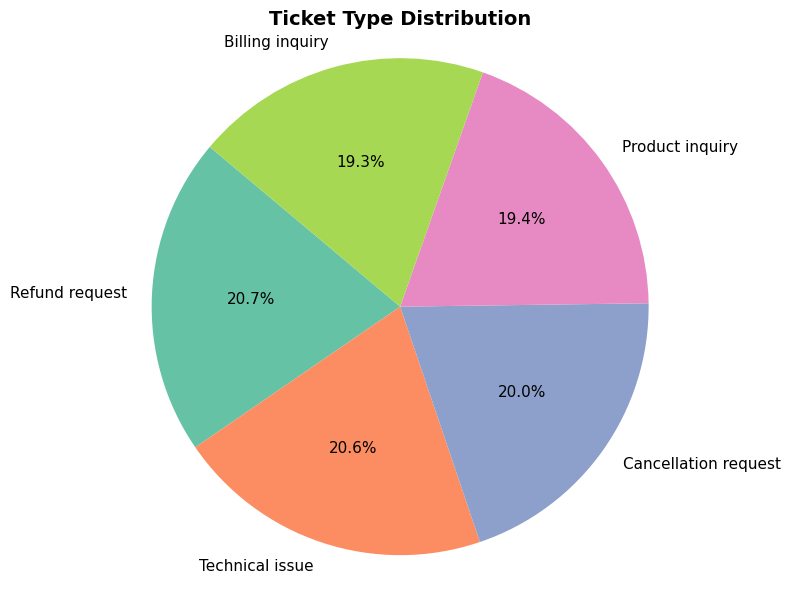

In [ ]:
# Count of ticket types
ticket_type_distribution = data['Ticket Type'].value_counts()

# Set colors using Seaborn palette for better aesthetics
colors = sns.color_palette('Set2', n_colors=len(ticket_type_distribution))

# Plot
plt.figure(figsize=(8, 6))
plt.pie(ticket_type_distribution,
        labels=ticket_type_distribution.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        textprops={'fontsize': 11})

plt.title('Ticket Type Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

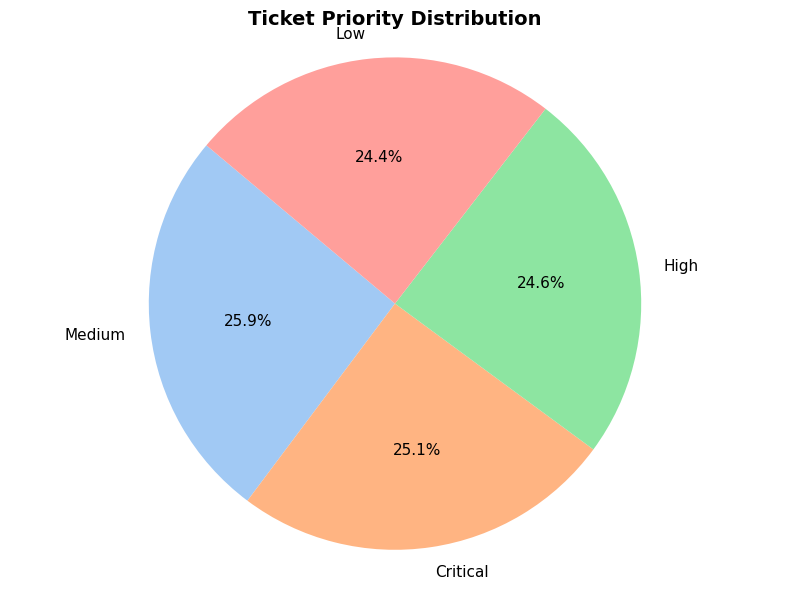

In [ ]:
# Count ticket priorities
priority_distribution = data['Ticket Priority'].value_counts()

# Set smart color palette based on number of priority levels
colors = sns.color_palette('pastel', n_colors=len(priority_distribution))

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(priority_distribution,
        labels=priority_distribution.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        textprops={'fontsize': 11})

# Title and formatting
plt.title('Ticket Priority Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')  # Make the pie a circle
plt.tight_layout()
plt.show()

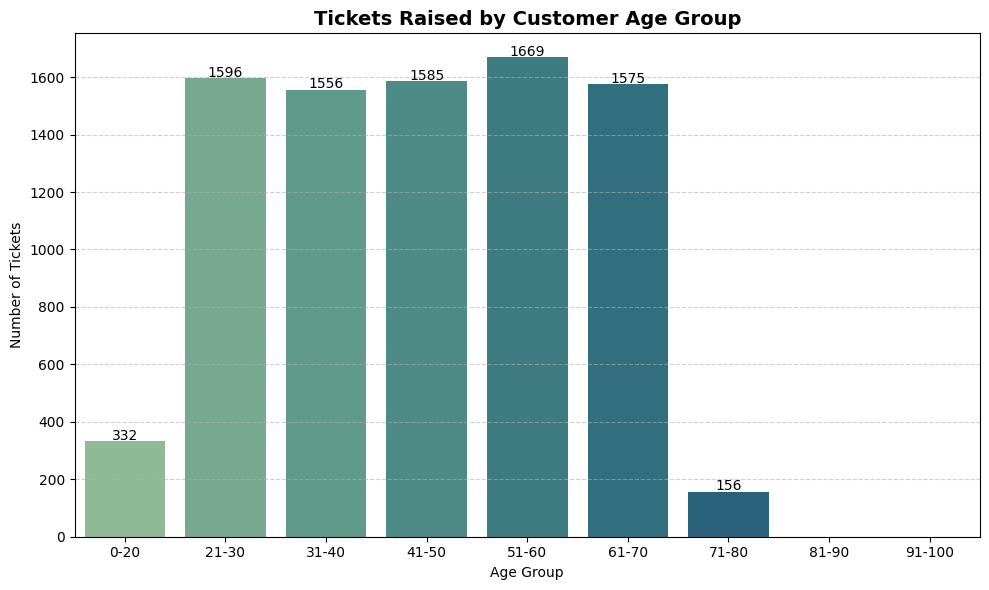

In [ ]:
# Define bins and labels for age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70',
          '71-80', '81-90', '91-100']

# Create Age Group column
data['Age Group'] = pd.cut(data['Customer Age'], bins=bins, labels=labels, right=False)

# Calculate number of tickets by age group
tickets_by_age_group = data.groupby('Age Group', observed=True).size().reset_index(name='Ticket Count')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Ticket Count', data=tickets_by_age_group, palette='crest')

# Add labels on bars
for index, row in tickets_by_age_group.iterrows():
    plt.text(index, row['Ticket Count'] + 5, int(row['Ticket Count']), ha='center', fontsize=10)

# Titles and formatting
plt.title('Tickets Raised by Customer Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


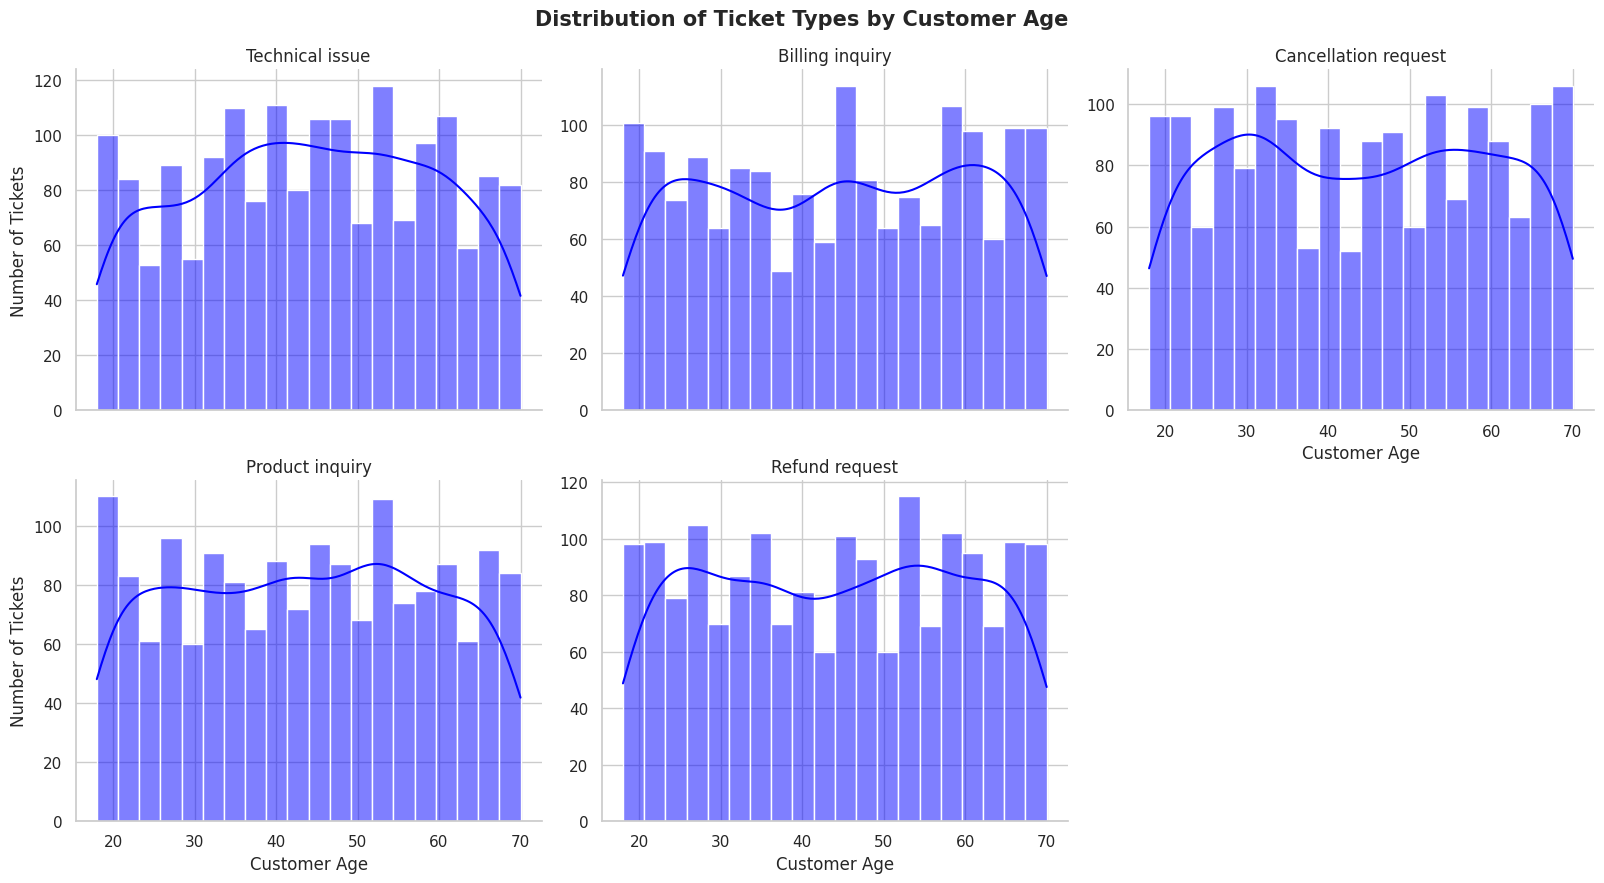

In [ ]:
# Replace inf values manually (not deprecated)
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop any rows with NaN in critical fields to avoid seaborn warnings
plot_data = data.dropna(subset=['Customer Age', 'Ticket Type'])

# Seaborn style
sns.set(style="whitegrid")

# FacetGrid by Ticket Type
g = sns.FacetGrid(plot_data,
                  col='Ticket Type',
                  col_wrap=3,
                  height=4.5,
                  aspect=1.2,
                  sharex=True,
                  sharey=False)

g.map(sns.histplot, 'Customer Age', bins=20, kde=True, color='blue')

# Custom titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('Customer Age', 'Number of Tickets')

# Main title and adjust layout
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle('Distribution of Ticket Types by Customer Age', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()


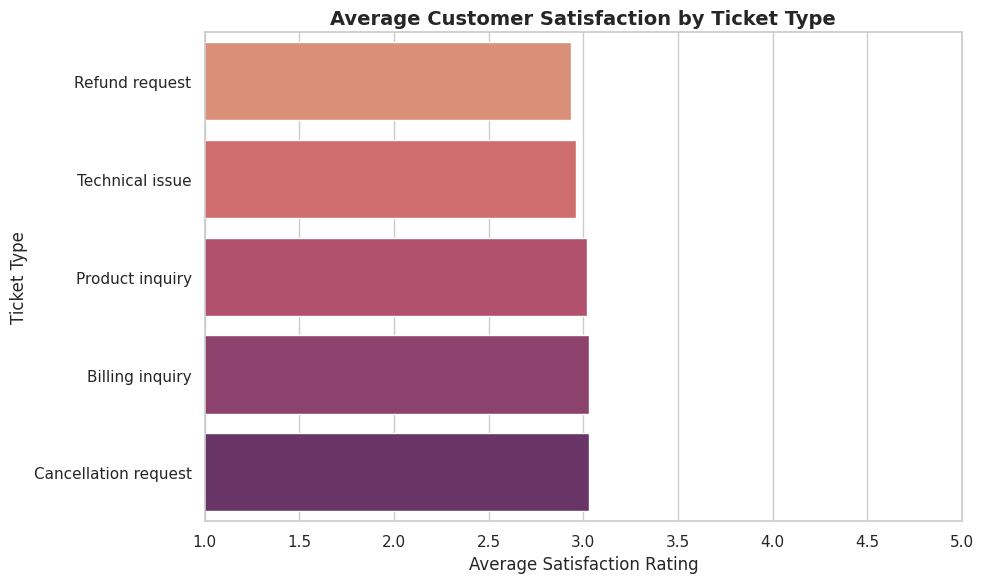

In [ ]:
# Calculate mean satisfaction rating for each ticket type
avg_satisfaction_by_type = data.groupby('Ticket Type')['Customer Satisfaction Rating'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_satisfaction_by_type.values, y=avg_satisfaction_by_type.index, palette='flare')
plt.title('Average Customer Satisfaction by Ticket Type', fontsize=14, fontweight='bold')
plt.xlabel('Average Satisfaction Rating')
plt.ylabel('Ticket Type')
plt.xlim(1, 5)
plt.tight_layout()
plt.show()

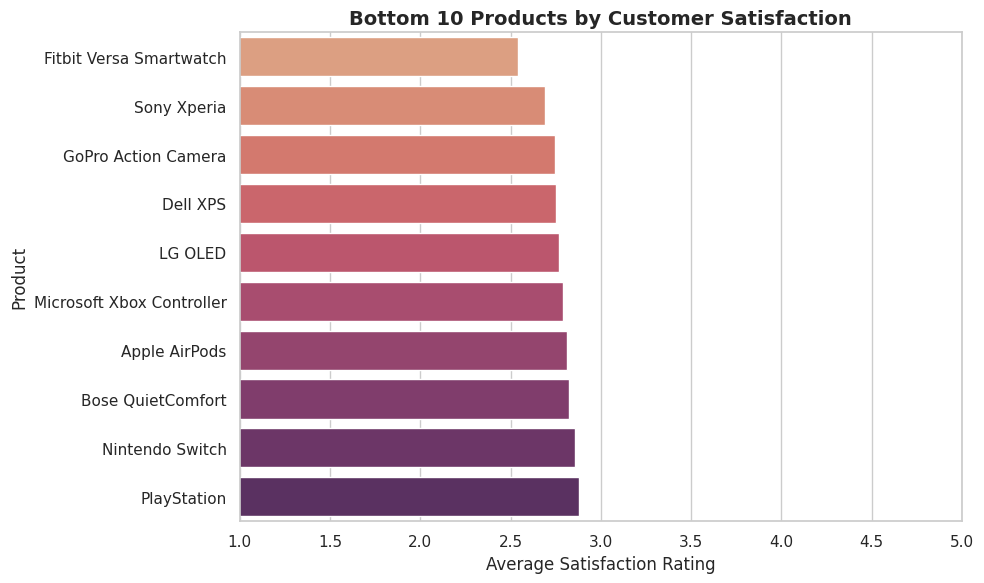

Product Purchased
Fitbit Versa Smartwatch      2.539683
Sony Xperia                  2.692308
GoPro Action Camera          2.745763
Dell XPS                     2.750000
LG OLED                      2.767123
Microsoft Xbox Controller    2.793103
Apple AirPods                2.810811
Bose QuietComfort            2.823529
Nintendo Switch              2.857143
PlayStation                  2.876923
Name: Customer Satisfaction Rating, dtype: float64


In [ ]:
# Average satisfaction per product
product_satisfaction = data.groupby('Product Purchased')['Customer Satisfaction Rating'].mean().sort_values().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=product_satisfaction.values, y=product_satisfaction.index, palette='flare')
plt.title('Bottom 10 Products by Customer Satisfaction', fontsize=14, fontweight='bold')
plt.xlabel('Average Satisfaction Rating')
plt.ylabel('Product')
plt.xlim(1, 5)
plt.tight_layout()
plt.show()

print(product_satisfaction)

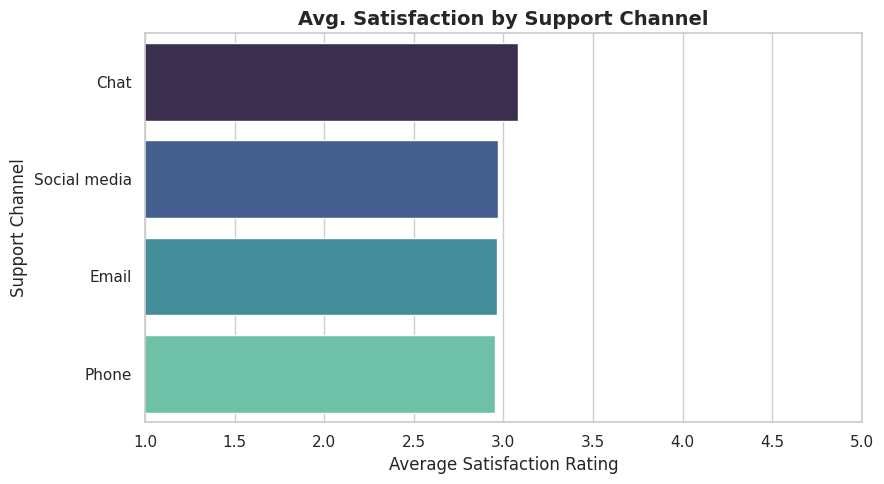

Ticket Channel
Chat            3.083086
Social media    2.969298
Email           2.963889
Phone           2.952243
Name: Customer Satisfaction Rating, dtype: float64


In [ ]:
# Group by ticket channel and compute mean satisfaction
channel_satisfaction = data.groupby('Ticket Channel')['Customer Satisfaction Rating'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(9, 5))
sns.barplot(x=channel_satisfaction.values, y=channel_satisfaction.index, palette='mako')
plt.title('Avg. Satisfaction by Support Channel', fontsize=14, fontweight='bold')
plt.xlabel('Average Satisfaction Rating')
plt.ylabel('Support Channel')
plt.xlim(1, 5)
plt.tight_layout()
plt.show()

print(channel_satisfaction)


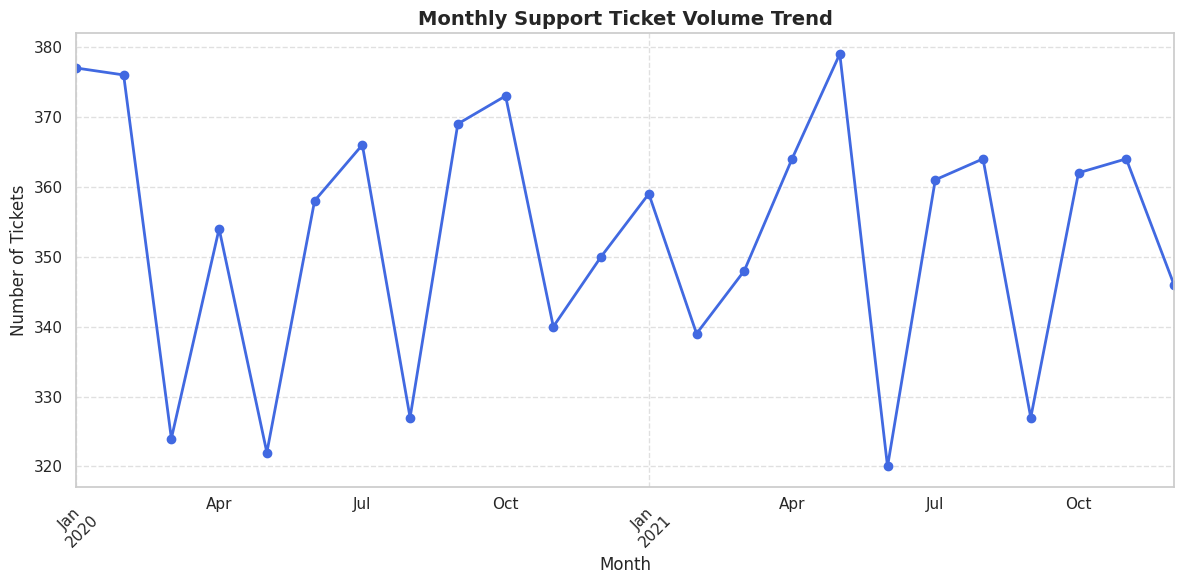

In [ ]:
# Ensure datetime is parsed
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'], errors='coerce')

# Create Year-Month for grouping
data['YearMonth'] = data['Date of Purchase'].dt.to_period('M')

# Group by time
monthly_tickets = data.groupby('YearMonth').size()

# Plot
plt.figure(figsize=(12, 6))
monthly_tickets.plot(marker='o', color='royalblue', linewidth=2)
plt.title('Monthly Support Ticket Volume Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


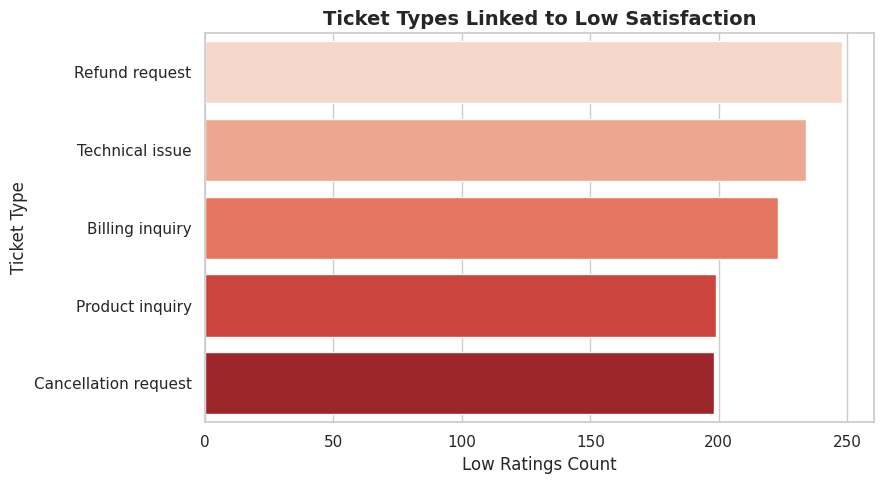

In [ ]:
# Filter low ratings only
low_satisfaction = data[data['Customer Satisfaction Rating'] <= 2]

# Count low satisfaction by ticket type
low_satisfaction_counts = low_satisfaction['Ticket Type'].value_counts()

# Plot
plt.figure(figsize=(9, 5))
sns.barplot(x=low_satisfaction_counts.values, y=low_satisfaction_counts.index, palette='Reds')
plt.title('Ticket Types Linked to Low Satisfaction', fontsize=14, fontweight='bold')
plt.xlabel('Low Ratings Count')
plt.ylabel('Ticket Type')
plt.tight_layout()
plt.show()

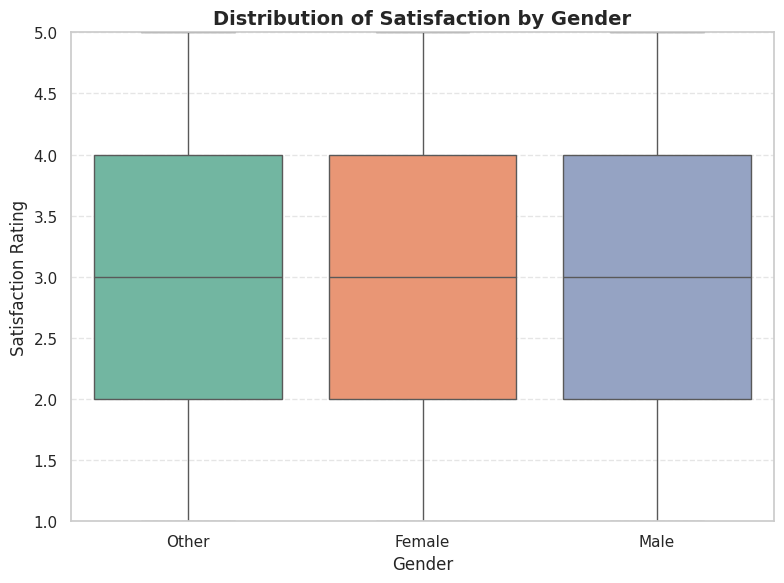

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer Gender', y='Customer Satisfaction Rating', data=data, palette='Set2')
plt.title('Distribution of Satisfaction by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Satisfaction Rating')
plt.ylim(1, 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Convert to datetime
data['First Response Time'] = pd.to_datetime(data['First Response Time'], errors='coerce')
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], errors='coerce')
# Calculate resolution time in hours
data['Resolution Time (Hrs)'] = (
    data['Time to Resolution'] - data['First Response Time']
).dt.total_seconds() / 3600

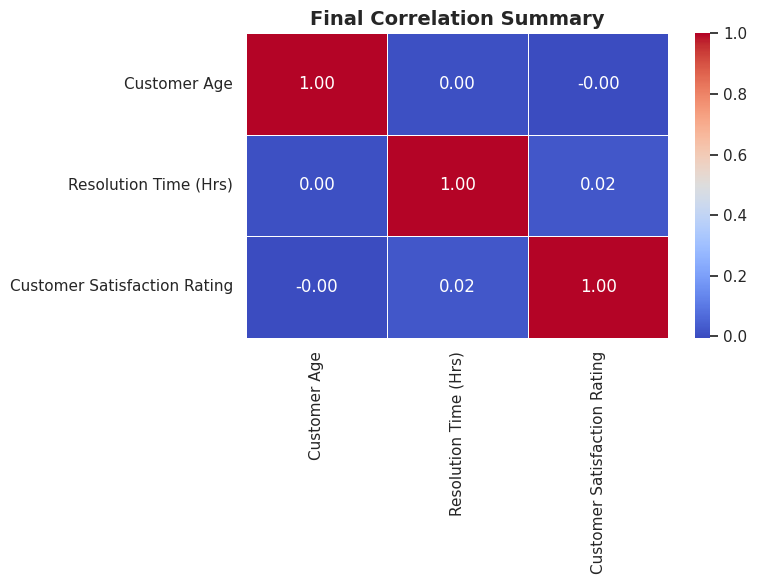

Final Cleaned Dataset Overview:
       Customer Age  Resolution Time (Hrs)  Customer Satisfaction Rating
count   2769.000000            2769.000000                   2769.000000
mean      44.333694              -0.057704                      2.991333
std       15.195495               9.564112                      1.407016
min       18.000000             -23.233333                      1.000000
25%       31.000000              -6.933333                      2.000000
50%       45.000000               0.166667                      3.000000
75%       57.000000               6.483333                      4.000000
max       70.000000              23.466667                      5.000000


In [ ]:
# Select numeric features and drop NaN rows
numeric_features = ['Customer Age', 'Resolution Time (Hrs)', 'Customer Satisfaction Rating']
correlation_data = data[numeric_features].dropna()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Final Correlation Summary', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Summary stats
print("Final Cleaned Dataset Overview:")
print(correlation_data.describe())

 Accuracy: 0.19253910950661854

 Classification Report:
               precision    recall  f1-score   support

         1.0       0.20      0.20      0.20       168
         2.0       0.23      0.21      0.22       174
         3.0       0.20      0.25      0.22       175
         4.0       0.18      0.17      0.17       162
         5.0       0.14      0.14      0.14       152

    accuracy                           0.19       831
   macro avg       0.19      0.19      0.19       831
weighted avg       0.19      0.19      0.19       831


 Confusion Matrix:
 [[33 26 40 39 30]
 [34 36 55 21 28]
 [34 26 43 33 39]
 [35 30 35 27 35]
 [25 36 37 33 21]]


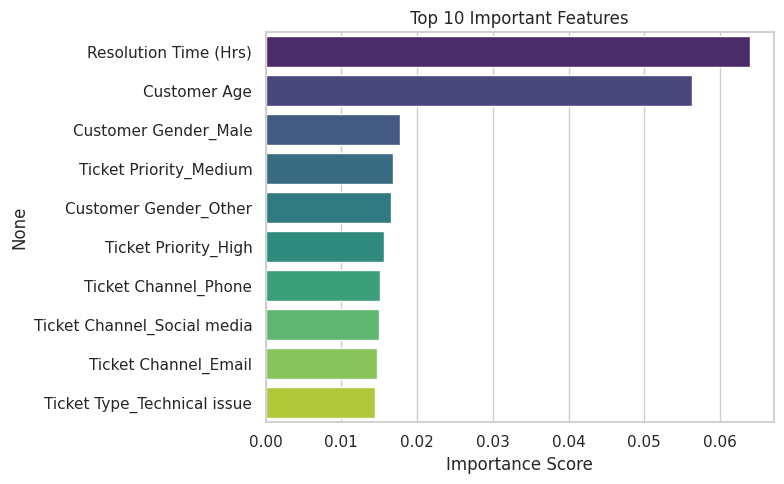

In [ ]:
#  Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define features and target
X = data.drop('Customer Satisfaction Rating', axis=1)
y = data['Customer Satisfaction Rating']

# Drop text-based and datetime/period columns
X = X.drop(columns=[
    'Customer Name', 'Customer Email', 'Ticket Description',
    'Ticket ID', 'Date of Purchase', 'First Response Time',
    'Time to Resolution', 'YearMonth'  # if exists
], errors='ignore')

# Encode any remaining object columns
X = pd.get_dummies(X, drop_first=True)

# Remove remaining missing values (if any)
X = X.dropna()
y = y.loc[X.index]  # Ensure y matches X

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train)

# Predict
y_pred = rfc.predict(X_test_scaled)

# Evaluate model
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot feature importances
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns).nlargest(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

**Summary for Report**

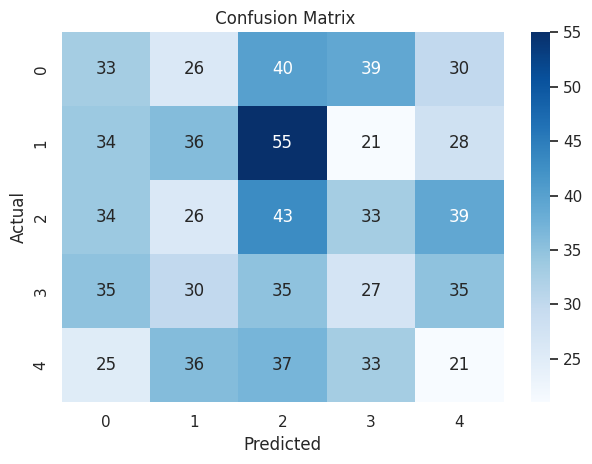

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(" Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()